In [1]:
import numpy as np
import pandas as pd

In [2]:
# Mount gdrive
from google.colab import drive, files
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
# Specify input file location
training_file = 'gdrive/My Drive/shopee/train.csv'
test_file = 'gdrive/My Drive/shopee/test.csv'
user_file = 'gdrive/My Drive/shopee/users.csv'

In [4]:
# Load dataset
training_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)
user_data = pd.read_csv(user_file)

In [5]:
# Show some samples of training data
training_data.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [6]:
# Show more info about training data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [7]:
# Show some samples of test data
test_data.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [8]:
# Show more info about test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

In [9]:
# Show some samples of user data
user_data.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


In [10]:
# Show more info about user data
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [11]:
# Show class distribution
training_data.groupby('open_flag')['user_id'].count()

open_flag
0    62083
1    11456
Name: user_id, dtype: int64

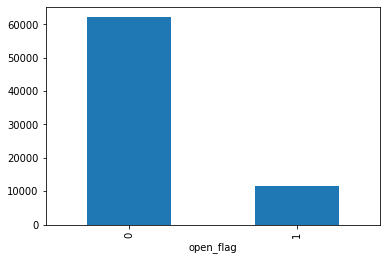

In [12]:
# Plot class distribution
training_data.groupby('open_flag')['user_id'].count().plot(kind='bar');

In [13]:
# Combine training and test data with user data
training_data = pd.merge(training_data, user_data, on='user_id', how='inner')
test_data = pd.merge(test_data, user_data, on='user_id', how='inner')

In [14]:
# Function to get max integer value
def get_max(dataframe, column, exceptional_string):
    
    unique_list = dataframe[column].unique().tolist()
    unique_list.remove(exceptional_string)
    max_value = max(list(map(int, unique_list)))
    
    return(max_value)

In [15]:
# Get max integer value
max_last_open = get_max(
    training_data, 'last_open_day', 'Never open'
)
max_last_login = get_max(
    training_data, 'last_login_day', 'Never login'
)
max_last_checkout = get_max(
    training_data, 'last_checkout_day', 'Never checkout'
)

In [16]:
# Replace string with integer
training_data['last_open_day'] = training_data.last_open_day.replace(
    'Never open', str(max_last_open+1)
)
training_data['last_login_day'] = training_data.last_login_day.replace(
    'Never login', str(max_last_login+1)
)
training_data['last_checkout_day'] = training_data.last_checkout_day.replace(
    'Never checkout', str(max_last_checkout+1)
)

test_data['last_open_day'] = test_data.last_open_day.replace(
    'Never open', str(max_last_open+1)
)
test_data['last_login_day'] = test_data.last_login_day.replace(
    'Never login', str(max_last_login+1)
)
test_data['last_checkout_day'] = test_data.last_checkout_day.replace(
    'Never checkout', str(max_last_checkout+1)
)

In [17]:
# Filter data based on age information
age_data = training_data[training_data.age.notnull()]
age_data = age_data[(age_data.age >= 17) & (age_data.age <= 60)]
age_data.shape

(44143, 23)

In [18]:
# Perform correlation analysis between age and target variable
age_data.loc[:, ['age', 'open_flag']].corr()

,age,open_flag
age,1.00000,0.10711
open_flag,0.10711,1.00000


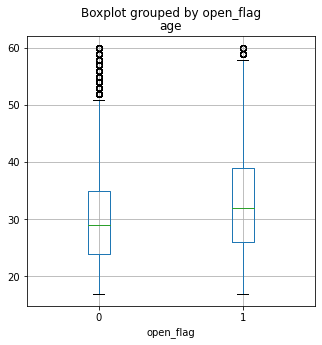

In [19]:
# Plot the age data
age_data.boxplot(column='age', by='open_flag', figsize=(5, 5));

In [20]:
# Change column type in training data
training_data['last_open_day'] = training_data['last_open_day'].astype('int')
training_data['last_login_day'] = training_data['last_login_day'].astype('int')
training_data['last_checkout_day'] = training_data['last_checkout_day']. \
    astype('int')
training_data['country_code'] = training_data['country_code'].astype('str')
training_data['attr_1'] = training_data['attr_1'].fillna(2.0). \
    astype('int').astype('str')
training_data['attr_2'] = training_data['attr_2'].fillna(2.0). \
    astype('int').astype('str')
training_data['attr_3'] = training_data['attr_3'].astype('int').astype('str')
training_data['grass_date'] = pd.to_datetime(
    training_data.grass_date, 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

# Change column type in test data
test_data['last_open_day'] = test_data['last_open_day'].astype('int')
test_data['last_login_day'] = test_data['last_login_day'].astype('int')
test_data['last_checkout_day'] = test_data['last_checkout_day'].astype('int')
test_data['country_code'] = test_data['country_code'].astype('str')
test_data['attr_1'] = test_data['attr_1'].fillna(2.0). \
    astype('int').astype('str')
test_data['attr_2'] = test_data['attr_2'].fillna(2.0). \
    astype('int').astype('str')
test_data['attr_3'] = test_data['attr_3'].astype('int').astype('str')
test_data['grass_date'] = pd.to_datetime(
    test_data.grass_date, 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

In [21]:
# Derive more information from grass date in training data
training_data['day_of_year'] = training_data.grass_date.dt.dayofyear
training_data['day_of_month'] = training_data.grass_date.dt.day
training_data['day_of_week'] = training_data.grass_date.dt.dayofweek

# Derive more information from grass date in test data
test_data['day_of_year'] = test_data.grass_date.dt.dayofyear
test_data['day_of_month'] = test_data.grass_date.dt.day
test_data['day_of_week'] = test_data.grass_date.dt.dayofweek

In [22]:
# Specify some interesting variables
variables = [
    'country_code',
    'day_of_year', 
    'day_of_month', 
    'day_of_week', 
    'subject_line_length', 
    'last_open_day', 
    'last_login_day', 
    'last_checkout_day', 
    'open_count_last_10_days',
    'open_count_last_30_days',
    'open_count_last_60_days',
    'login_count_last_10_days',
    'login_count_last_30_days',
    'login_count_last_60_days',
    'checkout_count_last_10_days',
    'checkout_count_last_30_days',
    'checkout_count_last_60_days',
    'attr_1',
    'attr_2',
    'attr_3',
    'domain', 
    'open_flag'
]

In [23]:
# Take a subset of data using the selected variables
subset = training_data[variables]

In [24]:
# Encode the categorical variables
subset = pd.get_dummies(subset)

In [25]:
# Perform correlation analysis towards target variable
subset.corr()['open_flag']

day_of_year                   -0.036710
day_of_month                   0.009038
day_of_week                   -0.003278
subject_line_length           -0.057357
last_open_day                 -0.122625
last_login_day                 0.018401
last_checkout_day             -0.027494
open_count_last_10_days        0.515307
open_count_last_30_days        0.507853
open_count_last_60_days        0.477766
login_count_last_10_days       0.014023
login_count_last_30_days       0.010134
login_count_last_60_days       0.008633
checkout_count_last_10_days    0.015573
checkout_count_last_30_days    0.013419
checkout_count_last_60_days    0.010231
open_flag                      1.000000
country_code_1                -0.163462
country_code_2                 0.047029
country_code_3                -0.032401
country_code_4                 0.163466
country_code_5                 0.046842
country_code_6                 0.039069
country_code_7                 0.044194
attr_1_0                       0.013143


In [26]:
# Perform correlation analysis between variables
subset.corr()

,day_of_year,day_of_month,day_of_week,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,attr_1_0,attr_1_1,attr_1_2,attr_2_0,attr_2_1,attr_2_2,attr_3_0,attr_3_1,attr_3_2,attr_3_3,attr_3_4,domain_@163.com,domain_@gmail.com,domain_@hotmail.com,domain_@icloud.com,domain_@live.com,domain_@outlook.com,domain_@qq.com,domain_@rocketmail.com,domain_@yahoo.com,domain_@ymail.com,domain_other
day_of_year,1.000000,-0.180783,0.051293,-0.161878,-0.054225,-0.064502,-0.027624,-0.044082,-0.015865,0.018810,0.036011,0.033629,0.041094,0.014989,0.012252,0.024702,-0.036710,0.105579,-0.085102,-0.076724,-0.020747,0.033821,0.040061,0.003207,-0.000423,0.019759,-0.019750,0.030032,0.029410,-0.064026,-0.019722,0.012208,0.010896,-0.000797,-0.003416,-0.004468,-0.009350,0.001938,-0.005869,0.002290,-0.004131,0.004180,-0.000158,0.015155,0.001193,-0.004110
day_of_month,-0.180783,1.000000,-0.054233,0.120910,0.032500,0.044792,-0.003533,-0.001264,0.007685,-0.000197,-0.008473,-0.001712,-0.003797,-0.008900,-0.000279,-0.004646,0.009038,-0.011828,0.006823,0.043368,0.000185,0.024371,-0.017357,-0.095718,0.005084,0.010174,-0.010303,0.017706,-0.046385,0.045721,-0.010315,0.006364,0.003455,0.005482,-0.001191,-0.002412,0.013781,-0.008605,0.005531,-0.003757,-0.000992,-0.000474,-0.005061,-0.010308,-0.001958,-0.003135
day_of_week,0.051293,-0.054233,1.000000,-0.063166,-0.041913,-0.018435,0.001799,0.036747,0.035735,0.029698,0.015242,0.012390,0.009303,0.012286,0.013841,0.013652,-0.003278,0.054436,-0.068263,0.002611,0.018038,-0.106248,0.075968,0.037707,-0.002629,0.002591,-0.002525,-0.035287,0.037136,-0.018675,-0.002675,0.006468,-0.001331,0.000238,-0.005206,-0.005733,0.001103,0.015812,-0.004392,0.002439,0.002122,-0.002976,0.002297,-0.012392,0.005608,-0.001146
subject_line_length,-0.161878,0.120910,-0.063166,1.000000,0.045207,0.045181,0.045423,-0.027971,-0.045970,-0.049144,-0.005046,-0.007230,-0.010097,0.010012,0.012583,0.011023,-0.057357,0.291616,-0.070545,-0.025515,-0.090102,-0.389729,-0.049324,0.192164,0.001465,0.006966,-0.007004,-0.048890,-0.007585,0.051454,-0.007037,0.013964,-0.002227,-0.000643,-0.008306,-0.001389,0.060719,-0.064994,-0.012920,-0.008630,-0.004194,-0.009118,0.010939,-0.016931,0.009089,-0.023209
last_open_day,-0.054225,0.032500,-0.041913,0.045207,1.000000,0.172762,0.159689,-0.221551,-0.260328,-0.268762,-0.068783,-0.082136,-0.110323,-0.036392,-0.043608,-0.062159,-0.122625,-0.012426,-0.091477,0.113454,0.017453,-0.014783,-0.046614,0.034444,-0.004543,-0.095187,0.095308,0.099457,-0.200773,0.178520,0.095314,-0.042095,-0.063726,0.006014,0.002242,-0.006431,-0.011337,-0.002414,-0.003973,-0.010150,0.007335,-0.014417,-0.006802,0.027778,-0.005782,-0.004381
last_login_day,-0.064502,0.044792,-0.018435,0.045181,0.172762,1.000000,0.023598,-0.025840,-0.030308,-0.030652,-0.015190,-0.016134,-0.015819,-0.013081,-0.014256,-0.014706,0.018401,-0.055159,-0.025111,-0.017514,0.175073,-0.009091,-0.011149,-0.004528,-0.000043,-0.024874,0.024877,-0.003980,-0.726661,0.955198,0.025000,-0.024832,-0.003660,-0.009457,0.010008,-0.002880,-0.009185,-0.011353,0.000648,-0.003072,-0.003901,-0.006222,-0.002070,0.016812,-0.003404,0.017901
last_checkout_day,-0.027624,-0.003533,0.001799,0.045423,0.159689,0.023598,1.000000,-0.042416,-0.045330,-0.053350,-0.302356,-0.323827,-0.339238,-0.195981,-0.223374,-0.236535,-0.027494,-0.009087,0.025018,0.090478,-0.081427,-0.125568,0.026963,0.055127,0.021966,-0.429447,0.428926,0.002584,0.015100,-0.021973,0.429302,-0.151216,-0.285580,-0.016298,-0.049216,0.064820,0.006903,-0.047809,0.001195,-0.004997,0.023251,0.116428,-0.008629,-0.030162,-0.012173,0.030688
open_count_last_10_days,-0.044082,-0.001264,0.036747,-0.027971,-0

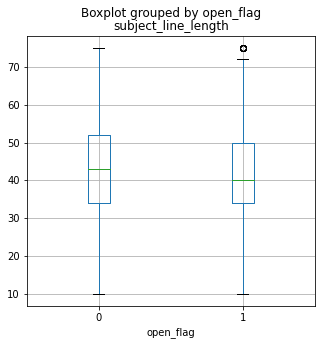

In [27]:
# Plot the subject_line_length data
training_data \
    .loc[:, ['subject_line_length', 'open_flag']] \
    .boxplot(column='subject_line_length', by='open_flag', figsize=(5, 5));

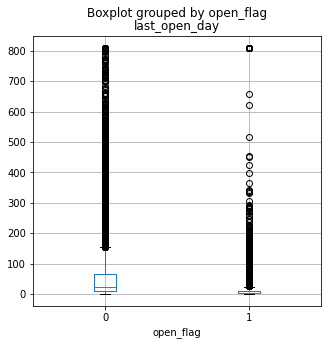

In [28]:
# Plot the last_open_day data
training_data \
    .loc[:, ['last_open_day', 'open_flag']] \
    .boxplot(column='last_open_day', by='open_flag', figsize=(5, 5));

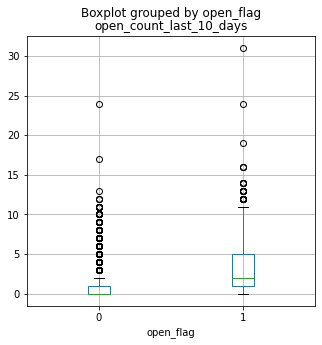

In [29]:
# Plot the open_count_last_10_days data
training_data \
    .loc[:, ['open_count_last_10_days', 'open_flag']] \
    .boxplot(column='open_count_last_10_days', by='open_flag', figsize=(5, 5));

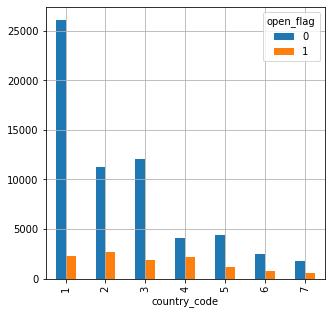

In [30]:
# Plot the country code data
training_data. \
    groupby(['country_code', 'open_flag'])['user_id'].count().reset_index(). \
    pivot(index='country_code', columns='open_flag', values='user_id'). \
    plot.bar(figsize=(5,5), grid=True);